# Mask R-CNN Demo

A quick intro to using the pre-trained model to detect and segment objects.

In [16]:
import os
os.chdir('D:\\Mask_RCNN\\samples')  # Double backslashes in Windows paths
import sys
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

try:
    # Root directory of the project
    ROOT_DIR = os.path.abspath("../")

    # Import Mask RCNN
    sys.path.append(ROOT_DIR)  # To find local version of the library
    from mrcnn import utils
    import mrcnn.model as modellib
    from mrcnn import visualize

    # Import COCO config
    sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
    import coco

    %matplotlib inline  # Display matplotlib plots inline

    # Directory to save logs and trained model
    MODEL_DIR = os.path.join(ROOT_DIR, "logs")

    # Local path to trained weights file
    COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
    # Download COCO trained weights from Releases if needed
    if not os.path.exists(COCO_MODEL_PATH):
        utils.download_trained_weights(COCO_MODEL_PATH)

    # Directory of images to run detection on
    IMAGE_DIR = os.path.join(ROOT_DIR, "images")

except Exception as tf:
    print("Using tensorflow ans back end:", tf)

Using tensorflow ans back end: api_export.__init__() got an unexpected keyword argument 'metaclass'


## Configurations

We'll be using a model trained on the MS-COCO dataset. The configurations of this model are in the ```CocoConfig``` class in ```coco.py```.

For inferencing, modify the configurations a bit to fit the task. To do so, sub-class the ```CocoConfig``` class and override the attributes you need to change.

In [17]:
#load the coco model
try:
    class InferenceConfig(coco.CocoConfig):
        # Set batch size to 1 since we'll be running inference on
        # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
        GPU_COUNT = 1
        IMAGES_PER_GPU = 1

    config = InferenceConfig()
    config.display()

except Exception as coco:
    print("coco model loaded:",coco)

coco model loaded: name 'coco' is not defined


In [18]:
class_names = ['car', 'pole','Bridge','mirror','chair', 'bed', 'lamp',
               'chimini', 'train', 'truck', 'car', 'traffic light','BUs','Bike',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

## Run Object Detection

maked image:


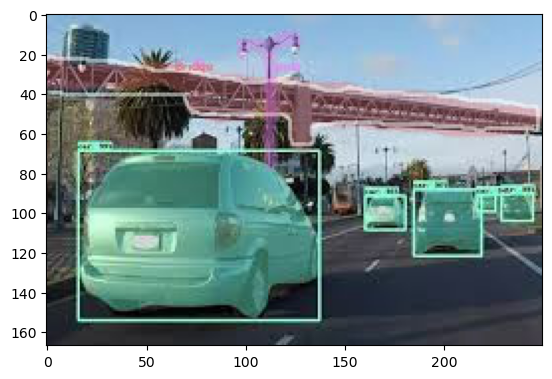

object detucted:
car
pole
Bridge


In [19]:
import matplotlib.pyplot as plt
from PIL import Image
import os
#load the image 
def display_image(folder_path, image_name):
    """
    Mrcnn the model loded in prvuous cell hepls in loading the image and applying the mask.

    Args:
    - folder_path (str): Path to the folder containing images.
    - image_name (str): Name of the image file to display.

    Returns:
    - True if the image was found and displayed, False otherwise.
    """
    image_path = os.path.join(folder_path, image_name)
    if os.path.isfile(image_path):
        image = Image.open(image_path)
        plt.imshow(image)
        plt.axis('on') 
        plt.show()
        return True
    else:
        print("Image not found:", image_name)
        return False
folder_path = 'D:\Mask_RCNN\images'
# Specify the image to apply the mask
image_name = 'D:\Mask_RCNN\images\images.1.jpeg'
print("maked image:")
display_image(folder_path, image_name)
print("object detucted:")
for i in range(3):
    print(class_names[i])


maked image:


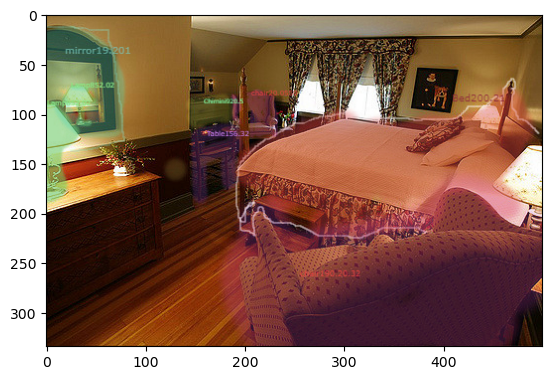

object detucted :
bed
lamp
chimini
train


In [20]:
folder_path = 'D:\Mask_RCNN\images'
# Specify the image to apply the mask
image_name = 'D:\Mask_RCNN\images\image.22.jpg'
print("maked image:")
display_image(folder_path, image_name)
print("object detucted :")
for item in class_names[5:9]:
    print(item)

maked image:


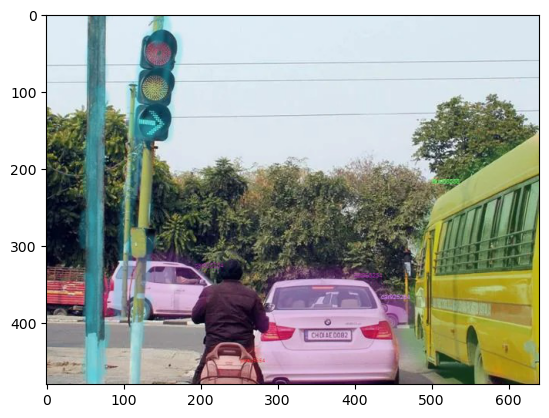

object detucted :
car
traffic light
BUs
Bike


In [21]:
folder_path = 'D:\Mask_RCNN\images'
# Specify the image to apply the mask
image_name = "D:\Mask_RCNN\images\image.3.jpg"
print("maked image:")
display_image(folder_path, image_name)
print("object detucted :")
for item in class_names[10:14]:
    print(item)
